In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing import image
import matplotlib.pyplot as plt
import sys
import os
import time

In [3]:
batch_size = 12
num_epochs = 50

In [4]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(200,200,1)))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2))

cnn.add(Flatten())

cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

In [9]:
outputs = './outputs'

if not os.path.exists(outputs):
    os.mkdir(outputs)

output_id = int(time.time())

os.mkdir(f'./{outputs}/{output_id}')
output_file_name = f'./{outputs}/{output_id}/output.txt'
output_file = open(output_file_name, 'w+')
orig_stdout = sys.stdout
sys.stdout = output_file

In [10]:
cnn.summary()

In [11]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(200,200),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    'data/test',
    target_size=(200,200),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size)

In [15]:
hist = cnn.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=8,
    validation_data=validation_generator,
    validation_steps=2)

In [16]:
sys.stdout = orig_stdout
output_file.close()

In [17]:
loss_png_file = open(f'./{outputs}/{output_id}/loss.png', 'w')
sys.stdout = loss_png_file

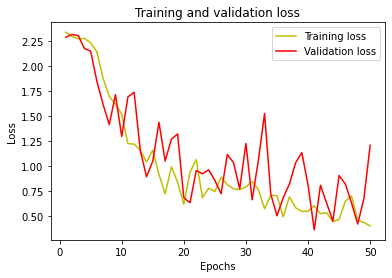

In [18]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(sys.stdout.buffer)

In [19]:
loss_png_file.close()
sys.stdout = orig_stdout

In [20]:
acc_png_file = open(f'./{outputs}/{output_id}/accuracy.png', 'w')
sys.stdout = acc_png_file

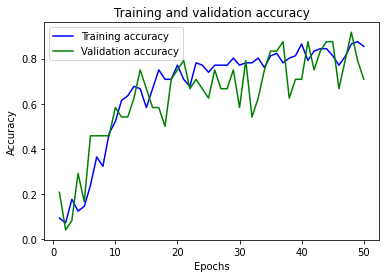

In [21]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'green', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(sys.stdout.buffer)

In [22]:
acc_png_file.close()
sys.stdout = orig_stdout

In [24]:
models = './models'

if not os.path.exists(models):
    os.mkdir(models)

cnn.save(f'{models}/{output_id}.h5py')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/1638198758.h5py\assets
